# Practicel ML - KNN

### Full Name : Payam Taebi
### Student Number : 400104867

In this Notebook, we will implement KNN for the given dataset. This notebook has 3 phases, in the first phase we explore dataset, in the second phase we preprocess the dataset and in the last phase we implement KNN from scratch and also with sklearn and train it on the dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Inspect the first rows of the dataframe

In [3]:
df = pd.read_csv('train.csv')  # Replace 'your_dataset.csv' with your actual dataset path

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Age Attrition BusinessTravel  DailyRate              Department  \
0   29        No  Travel_Rarely        592  Research & Development   
1   36        No  Travel_Rarely        884                   Sales   
2   34        No  Travel_Rarely       1326                   Sales   
3   27        No  Travel_Rarely        954                   Sales   
4   32        No  Travel_Rarely        929                   Sales   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 7          3  Life Sciences              1            1883   
1                 1          4  Life Sciences              1            1585   
2                 3          3          Other              1            1478   
3                 9          3      Marketing              1            1965   
4                10          3      Marketing              1             722   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \

Calculate the number of samples

In [4]:
num_samples = df.shape[0]

# Display the number of samples
print(f"Number of samples in the dataset: {num_samples}")

Number of samples in the dataset: 1102


Measure the number of unique values for each column. Note that Attrition is the target column.

In [7]:
columns_to_check = df.columns[df.columns != 'Attrition']

unique_value_counts = {}
for column in columns_to_check:
    unique_value_counts[column] = df[column].nunique()

print("Number of unique values for each column (excluding 'Attrition'):")
for column, count in unique_value_counts.items():
    print(f"{column}: {count}")

Number of unique values for each column (excluding 'Attrition'):
Age: 43
BusinessTravel: 3
DailyRate: 736
Department: 3
DistanceFromHome: 29
Education: 5
EducationField: 6
EmployeeCount: 1
EmployeeNumber: 1102
EnvironmentSatisfaction: 4
Gender: 2
HourlyRate: 71
JobInvolvement: 4
JobLevel: 5
JobRole: 9
JobSatisfaction: 4
MaritalStatus: 3
MonthlyIncome: 1027
MonthlyRate: 1082
NumCompaniesWorked: 10
Over18: 1
OverTime: 2
PercentSalaryHike: 15
PerformanceRating: 2
RelationshipSatisfaction: 4
StandardHours: 1
StockOptionLevel: 4
TotalWorkingYears: 40
TrainingTimesLastYear: 7
WorkLifeBalance: 4
YearsAtCompany: 34
YearsInCurrentRole: 19
YearsSinceLastPromotion: 16
YearsWithCurrManager: 17


Check if there is a column with less than two unique values. If such a columns exists, remove it!

In [8]:
# Check for columns with less than two unique values and remove them
columns_to_remove = []
for column in df.columns:
    if df[column].nunique() < 2:
        columns_to_remove.append(column)

# Remove columns with less than two unique values
if columns_to_remove:
    df.drop(columns_to_remove, axis=1, inplace=True)
    print("Columns with less than two unique values have been removed.")
else:
    print("No columns with less than two unique values found.")

# Display the updated dataframe
print("\nUpdated dataframe:")
print(df.head())

Columns with less than two unique values have been removed.

Updated dataframe:
   Age Attrition BusinessTravel  DailyRate              Department  \
0   29        No  Travel_Rarely        592  Research & Development   
1   36        No  Travel_Rarely        884                   Sales   
2   34        No  Travel_Rarely       1326                   Sales   
3   27        No  Travel_Rarely        954                   Sales   
4   32        No  Travel_Rarely        929                   Sales   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 7          3  Life Sciences            1883   
1                 1          4  Life Sciences            1585   
2                 3          3          Other            1478   
3                 9          3      Marketing            1965   
4                10          3      Marketing             722   

   EnvironmentSatisfaction  ... PerformanceRating  RelationshipSatisfaction  \
0                        4  .

Plot Mean BusinessTravel against Age. Note: Since the BusinessTravel column is categorical, you should first consider another column corresponding to each unique value BusinessTravel takes. For instance, you may assume that if someone does not travel, the value of the column for this person is 0.

In [21]:
print('Number of unique values for BusinessTravel:', df['BusinessTravel'].nunique())
mapping = {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}

Number of unique values for BusinessTravel: 3


In [22]:
# Map the column
df['BusinessTravel_num'] = df['BusinessTravel'].map(mapping)
mean_bta = df.groupby('Age')['BusinessTravel_num'].mean()
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,NoTravel,BusinessTravel_num
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1883,4,...,3,3,2,1,2,False,False,True,0,1
1,36,No,Travel_Rarely,884,Sales,1,4,Life Sciences,1585,2,...,3,1,0,0,0,False,False,True,0,1
2,34,No,Travel_Rarely,1326,Sales,3,3,Other,1478,4,...,3,13,9,3,12,False,False,True,0,1
3,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1965,4,...,3,7,7,0,7,False,False,True,0,1
4,32,No,Travel_Rarely,929,Sales,10,3,Marketing,722,4,...,2,10,7,0,8,False,False,True,0,1


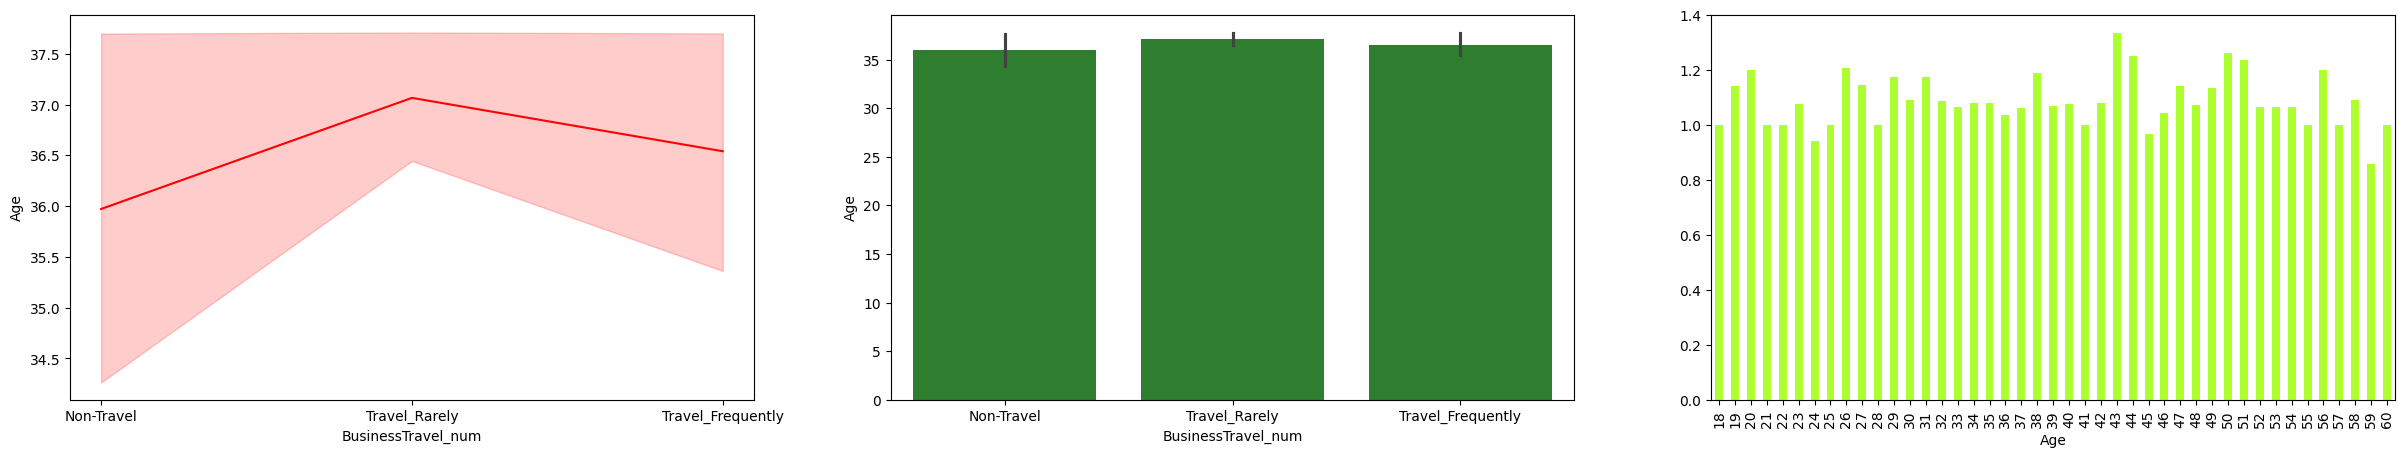

In [23]:
# plot
plt.figure(figsize=(30, 5))

plt.subplot(1, 3, 1)
sns.lineplot(x='BusinessTravel_num', y='Age', data=df, color='red')
plt.xticks(ticks=[0, 1, 2], labels=mapping.keys())

plt.subplot(1, 3, 2)
sns.barplot(x='BusinessTravel_num', y='Age', data=df, color='forestgreen')
plt.xticks(ticks=[0, 1, 2], labels=mapping.keys())

plt.subplot(1, 3, 3)
mean_bta.plot(kind='bar', color='greenyellow')

plt.show()

Check if there seems to be a meaningful relationship between people's age and the years they have worked with their current manager. Your result should be a plot.

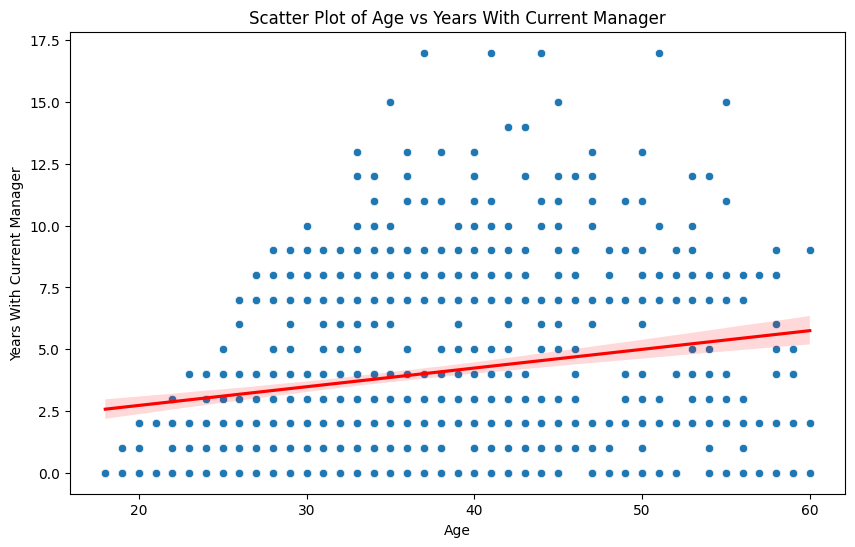

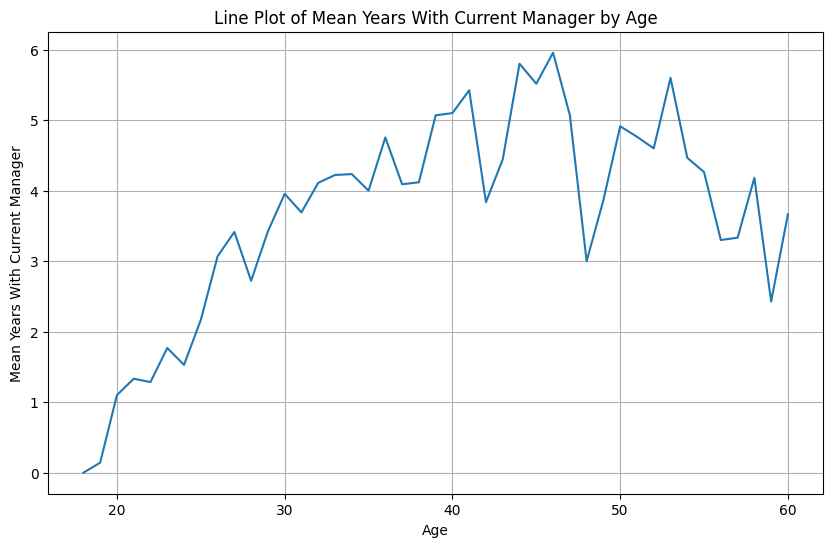

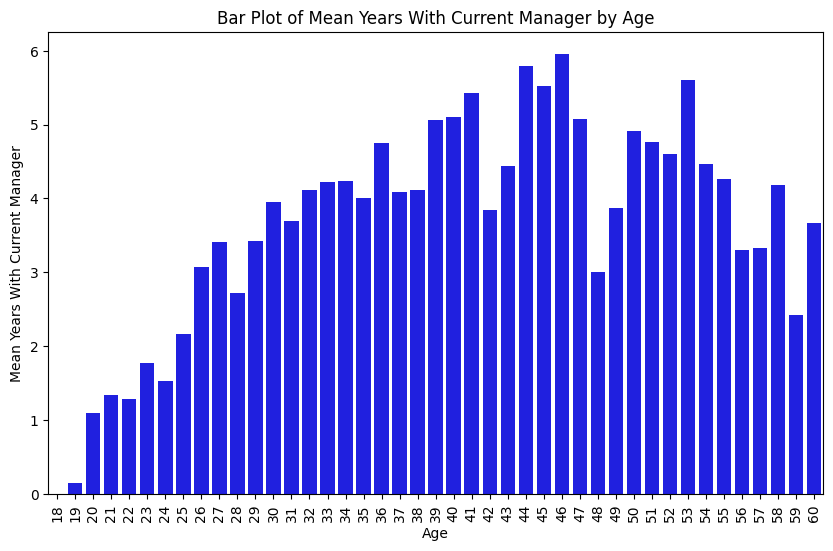

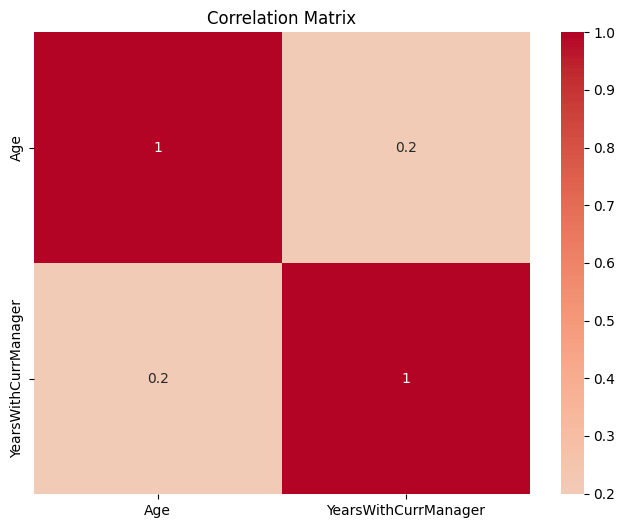

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='YearsWithCurrManager', data=df)
sns.regplot(x='Age', y='YearsWithCurrManager', data=df, scatter=False, color='red')
plt.title('Scatter Plot of Age vs Years With Current Manager')
plt.xlabel('Age')
plt.ylabel('Years With Current Manager')
plt.show()

# Line plot of mean YearsWithCurrManager by Age
mean_years_with_manager = df.groupby('Age')['YearsWithCurrManager'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=mean_years_with_manager.index, y=mean_years_with_manager.values)
plt.title('Line Plot of Mean Years With Current Manager by Age')
plt.xlabel('Age')
plt.ylabel('Mean Years With Current Manager')
plt.grid(True)
plt.show()

# Bar plot of mean YearsWithCurrManager by Age
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_years_with_manager.index, y=mean_years_with_manager.values, color='blue')
plt.title('Bar Plot of Mean Years With Current Manager by Age')
plt.xlabel('Age')
plt.ylabel('Mean Years With Current Manager')
plt.xticks(rotation=90)
plt.show()

# Calculate the correlation matrix
correlation_matrix = df[['Age', 'YearsWithCurrManager']].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

Plot the average MonthlyIncome against the YearsAtCompany.

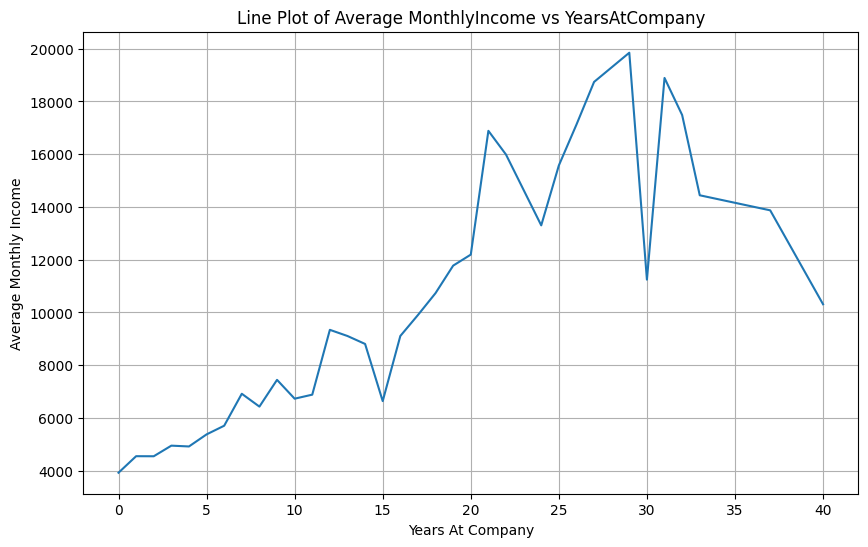

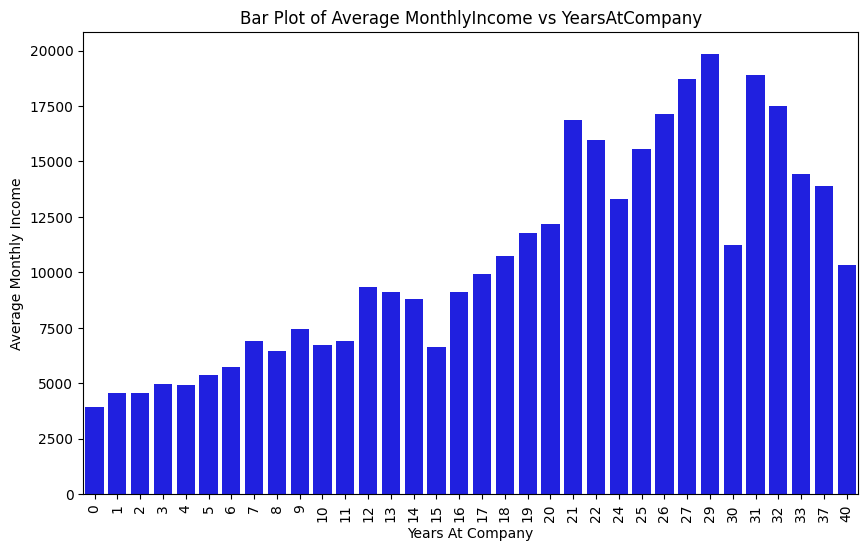

In [28]:

average_monthly_income = df.groupby('YearsAtCompany')['MonthlyIncome'].mean()

# Plot the average MonthlyIncome against the YearsAtCompany

# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=average_monthly_income.index, y=average_monthly_income.values)
plt.title('Line Plot of Average MonthlyIncome vs YearsAtCompany')
plt.xlabel('Years At Company')
plt.ylabel('Average Monthly Income')
plt.grid(True)
plt.show()

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=average_monthly_income.index, y=average_monthly_income.values, color='blue')
plt.title('Bar Plot of Average MonthlyIncome vs YearsAtCompany')
plt.xlabel('Years At Company')
plt.ylabel('Average Monthly Income')
plt.xticks(rotation=90)
plt.show()

## Preprocessing

Label encode all categorical columns and split the data into train and test parts. The training part will further splitted into train and validation parts.

Split the test and validation dataframe into feature and label part, Attrition columns is the target columns and rest of the columns should be treated as features. (Note that win_or_defeat column is the target column)

In [30]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Define the target column and feature columns
target_column = 'Attrition'  # Replace with your actual target column
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the data into train and test parts (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further split the training data into train and validation parts (75% train, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

# Print the lengths of the train, validation, and test datasets
print(f"Length of training dataset: {len(X_train)}")
print(f"Length of validation dataset: {len(X_val)}")
print(f"Length of test dataset: {len(X_test)}")

Length of training dataset: 660
Length of validation dataset: 221
Length of test dataset: 221



# Model Implementation From Scratch
  



## How the algorithm works

**We calculate the euclidean distance between a new sample and all points**

**We determine the label of the sample based on the majority vote**

## Key Points:

### Euclidean Distance
**Euclidean distance is defined as the distance between two points**

**Where it's represented by this equation :
$$\sqrt{\sum\limits_{i = 0}^{m-1} (x - y)^2}$$**


In [31]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=3):
        """
        Initialize the KNN classifier.

        Parameters:
        - k (int): Number of neighbors to consider.
        """
        self.k = k

    def fit(self, X_train, y_train):
        """
        Fit the KNN classifier to the training data.

        Parameters:
        - X_train (numpy array): Training feature vectors.
        - y_train (numpy array): Training labels.
        """
        self.X_train = X_train
        self.y_train = y_train

    def euclidean_distance(self, x1, x2):
        """
        Calculate the distance between two data points.

        Parameters:
        - x1 (numpy array): First data point.
        - x2 (numpy array): Second data point.

        Returns:
        - float: Distance between x1 and x2.
        """
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X_test):
        """
        Predict labels for test data.

        Parameters:
        - X_test (numpy array): Test feature vectors.

        Returns:
        - numpy array: Predicted labels.
        """
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        """
        Predict label for a single data point.

        Parameters:
        - x (numpy array): Test data point.

        Returns:
        - int: Predicted label.
        """
        # Compute distances between x and all examples in the training set
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]



# Evaluation
  

Define the model and train it.

In [35]:
knn = KNN(k=3)
knn.fit(X_train.values, y_train.values)

# Predict on the training set
y_train_pred = knn.predict(X_train.values)

# Predict on the test set
y_test_pred = knn.predict(X_test.values)

# Calculate the train and test error rates
train_error = np.mean(y_train_pred != y_train.values)
test_error = np.mean(y_test_pred != y_test.values)

# Calculate the train and test accuracies
train_accuracy = np.mean(y_train_pred == y_train.values)
test_accuracy = np.mean(y_test_pred == y_test.values)

print(f"Train Error: {train_error:.2f}")
print(f"Test Error: {test_error:.2f}")
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Train Error: 0.12
Test Error: 0.20
Train Accuracy: 0.88
Test Accuracy: 0.80


# Sklearn Implementation
  

Define the sklearn knn model and fit to the training data

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


knn_sklearn = KNeighborsClassifier(n_neighbors=3)
knn_sklearn.fit(X_train, y_train)

# Predict on the training set
y_train_pred_sklearn = knn_sklearn.predict(X_train)

# Predict on the test set
y_test_pred_sklearn = knn_sklearn.predict(X_test)

# Calculate the train and test errors
train_error_sklearn = 1 - accuracy_score(y_train, y_train_pred_sklearn)
test_error_sklearn = 1 - accuracy_score(y_test, y_test_pred_sklearn)

# Calculate the train and test accuracies
train_accuracy_sklearn = accuracy_score(y_train, y_train_pred_sklearn)
test_accuracy_sklearn = accuracy_score(y_test, y_test_pred_sklearn)

print(f"Train Error (Sklearn): {train_error_sklearn:.2f}")
print(f"Test Error (Sklearn): {test_error_sklearn:.2f}")
print(f"Train Accuracy (Sklearn): {train_accuracy_sklearn:.2f}")
print(f"Test Accuracy (Sklearn): {test_accuracy_sklearn:.2f}")

Train Error (Sklearn): 0.12
Test Error (Sklearn): 0.20
Train Accuracy (Sklearn): 0.88
Test Accuracy (Sklearn): 0.80


# Thank You


**Thank you for taking your time going through this notebook**

**If you have any feedback please let me know**